<a href="https://colab.research.google.com/github/handielg/Python/blob/main/NLP_Semana_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hemos estado experimentando con PNL para la clasificación de textos en las últimas semanas. Esta semana cambiarás de marcha y echarás un vistazo al uso de las herramientas que has aprendido para  predecir texto, lo que en última instancia significa que puedes  crear  texto. Al aprender secuencias de palabras puede predecir la palabra más común que viene a continuación en la secuencia y, por lo tanto, al comenzar a partir de una nueva secuencia de palabras puede crear un modelo que se basa en ellas. Tomarás diferentes conjuntos de entrenamiento, como canciones tradicionales irlandesas o poesía de Shakespeare, ¡y aprenderás a crear nuevos conjuntos de palabras usando sus incrustaciones!

#**Clase 1**

Hemos visto la clasificación del texto en las últimas lecciones. Pero ¿qué pasa si queremos generar nuevo texto? Ahora bien, esto puede sonar como un nuevo terreno ininterrumpido, pero cuando lo piensas, realmente has cubierto todo lo que necesitas para hacer esto ya. 

La predicción de texto es muy similar a la de imágenes. Podemos obtener un cuerpo de textos, extraer el vocabulario completo de él, y luego crear conjuntos de datos a partir de eso, donde hacemos que la frase X y la siguiente palabra en esa frase sea Ys. Por ejemplo, considere la frase, **Brilla, Brilla, Pequeña, Estrella**. ¿ Qué pasaría si creáramos datos de entrenamiento donde los Xs son **Brilla, Brilla, Pequeña, y la Y es Estrella?** Entonces, siempre que la red neuronal vea las palabras **Brilla, Brilla, Pequeña**, la siguiente palabra pronosticada sería **Estrella**. Por lo tanto, dadas suficientes palabras en un corpus con una red neuronal entrenada en cada una de las frases en ese corpus, y la siguiente palabra pronosticada, podemos llegar a una generación de texto bastante sofisticada.

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [ ]:
tokenizer = Tokenizer()

#esta es una canción irlandesa tradicional.
data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

corpus = data.lower().split("\n") #llevamos todo a minuscula e insertamos saltos de línea por oración.

tokenizer.fit_on_texts(corpus) #creamos el diccionario de palabras y el corpus general.
total_words = len(tokenizer.word_index) + 1 #número total de palabras en el corpus, obteniendo la longitud de su índice de palabras. Añadimos 1 para considerar palabras de vocabulario externo.

print(tokenizer.word_index)
print(total_words)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

Ahora, veamos el código para tomar este corpus y convertirlo en datos de entrenamiento. Aquí está el comienzo, desempaquetaré esta línea por línea. En primer lugar, nuestras x de entrenamiento se llamarán secuencias de entrada, y esta será una lista de Python. Luego, para cada línea en el corpus, generaremos una lista de tokens usando los tokenizers, textos al método de secuencias. Esto convertirá una línea de texto como, «En la ciudad de Athy un Jeremy Lanigan», en una lista de los tokens que representan las palabras. 

Luego vamos a iterar sobre esta lista de tokens y crear un número de secuencias de n-rangos, es decir, las dos primeras palabras de la oración o una secuencia, luego las tres primeras son otra secuencia, etc. El resultado de esto será, para la primera línea de la canción, la siguiente entrada secuencias que se generarán.

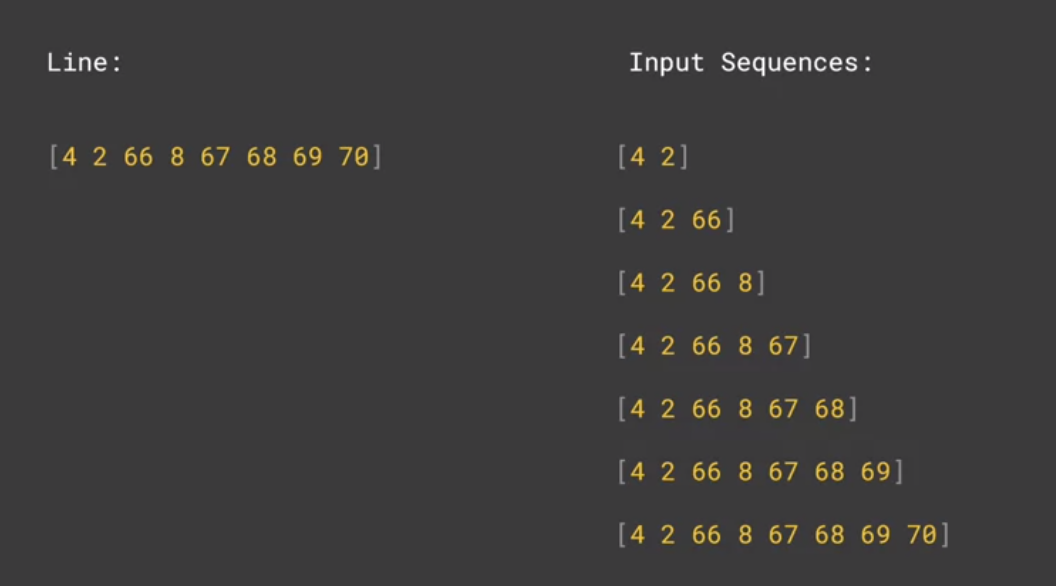

 El mismo proceso sucederá para cada línea, pero como puede ver, las secuencias de entrada son simplemente las oraciones que se dividen en frases, las dos primeras palabras, las tres primeras palabras, etc. 
 

In [ ]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

Luego necesitamos encontrar la longitud de la frase más larga en el corpus. Para hacer esto, iteraremos sobre todas las secuencias y encontraremos la más larga con código como este. 




In [ ]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences]) #encontramos la secuencia más larga.

Una vez que tengamos nuestra longitud de secuencia más larga, lo siguiente que hacer es rellenar todas las secuencias para que tengan la misma longitud. Vamos a pre-pad con ceros para que sea más fácil extraer la etiqueta, lo verás en unos momentos. Así que ahora, nuestra línea estará representada por un conjunto de secuencias de entrada acolchadas que se ven así, como la siguiente imagen. 


In [ ]:
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

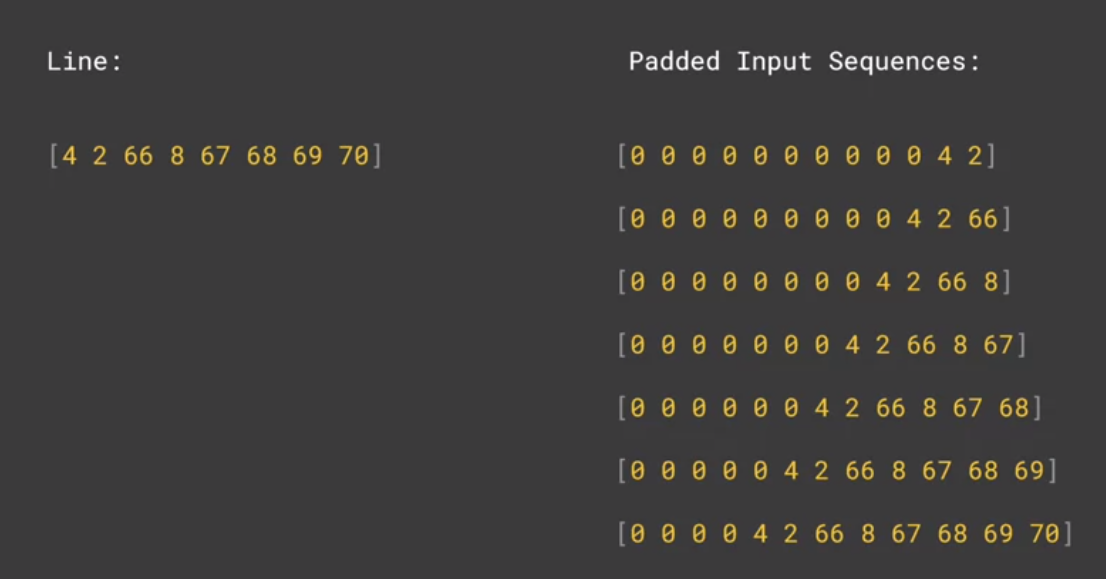

Ahora, que tenemos nuestras secuencias, lo siguiente que tenemos que hacer es convertirlas en x e y, nuestros valores de entrada y sus etiquetas. Cuando lo piensas, ahora que las oraciones están representadas de esta manera, todo lo que tenemos que hacer es tomar todo menos el último carácter como la x y luego usar el último carácter como la y en nuestra etiqueta. 

Hacemos eso así, donde para la primera secuencia, todo hasta el 4 es nuestra entrada y el 2 esnuestra etiqueta. 


Del mismo modo, aquí para la segunda secuencia donde la entrada es de dos palabras y la etiqueta es la tercera palabra, tokenizada a 66. 

En la tercera línea la entrada es de tres palabras y la etiqueta es 8, que fue la cuarta palabra de la oración. 

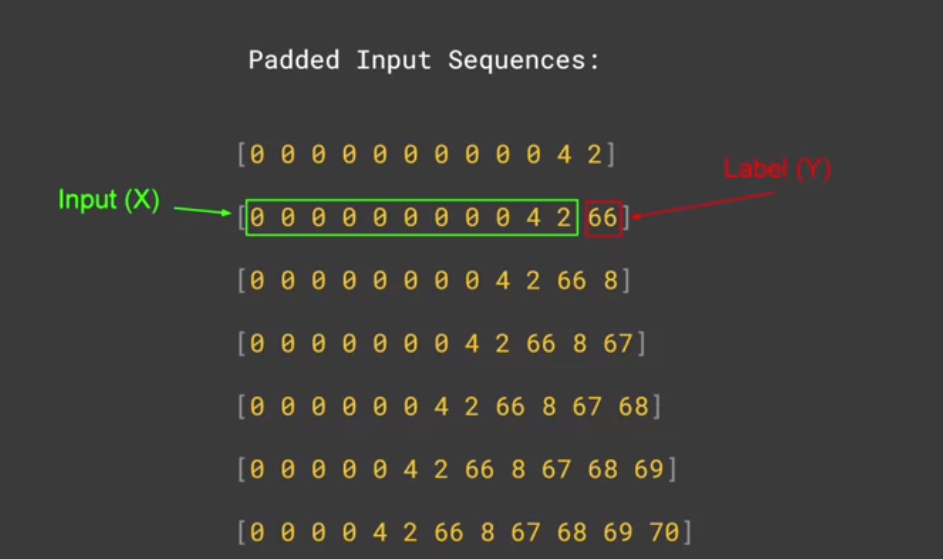

En este punto, debería quedar claro por qué hicimos pre-relleno, porque nos hace mucho más fácil obtener la etiqueta simplemente agarrando el último token.

Así que ahora, tenemos que dividir nuestras secuencias en nuestras X y nuestras Y. Para hacer esto, vamos a tomar los primeros n tokens, y hacerlos nuestras x. Luego obtendremos el último token y lo convertiremos en nuestra etiqueta. Antes de que la etiqueta se convierta en y, hay un paso más, y lo verás en breve. Python hace que esto sea realmente fácil de hacer con su menos sintaxis. Entonces, para obtener mis x, simplemente obtengo todas las secuencias de entrada cortadas para eliminar el último token. Para obtener las etiquetas, obtengo toda la secuencia de entrada cortada para mantener el último token. Ahora, debería codificar mis etiquetas, ya que esto realmente es un problema de clasificación. Cuando se le dé una secuencia de palabras, puedo clasificar desde el corpus, cuál sería la siguiente palabra. 





In [ ]:
# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1] #creamos las xs (eliminando el último token) y las etiquetas (tomando para estas últimas el último valor de la secuencia).

Entonces, para codificar un-hot, puedo usar la utilidad de contraste para convertir una lista a una categórica. Simplemente le doy la lista de etiquetas y el número de clases que es mi número de palabras, y creará una codificación unificada de las etiquetas (próxima línea de código). Así, por ejemplo, si consideramos esta lista de tokens como una frase:

`Sentence: [0 , 0, 68, 69, 70]`


entonces la x es la lista hasta el penúltimo valor, y la etiqueta es el último valor que en este caso es 70. 

`X: [0 , 0, 68, 69]`

`Label: [70]`

La y es una matriz codificada de una sola vez si la longitud es el tamaño del corpus de palabras y el valor que se establece en `1` es el que está en el índice de la etiqueta. 


`Y: [0. 0. 0. 0. ...1. 0. 0. 0. ]`

Es decir, el 1 está en la posición 71, que hace alusión al número 70 si empezamos desde 0 a contar.


Ahora tiene todos los datos listos para entrenar una red para la predicción. Con suerte, esto fue útil para ti. Veamos su pantalla de procesamiento de los datos, utilizando los métodos que vio en esta lección.

In [ ]:
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
#vemos el token de estas palabras.
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

4
2
66
8
67
68
69
70


In [ ]:
print(xs[6])

[ 0  0  0  4  2 66  8 67 68 69]


In [ ]:
print(ys[6]) #vemos que el 1 está en la posición 71, equivalente al número 70.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(xs[5])
print(ys[5])

[ 0  0  0  0  4  2 66  8 67 68]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(tokenizer.word_index)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [ ]:

model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=500, verbose=0)

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

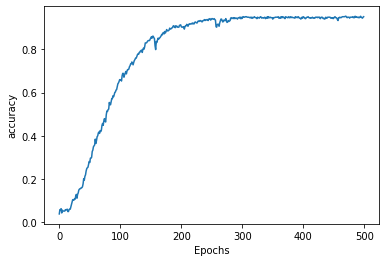

In [ ]:
plot_graphs(history, 'accuracy')

In [ ]:
seed_text = "Laurence went to dublin" #le pasamos esta frase al modelo para ver que nos dice.
next_words = 10
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

[Enlace con ejemplo](https://www.tensorflow.org/tutorials/text/text_generation)



#**Resumen**

Así que aquí está el cuaderno con los datos básicos de una sola canción y música tradicional irlandesa. Más tarde vamos a hacer un corpus con un montón de canciones. Pero echemos un vistazo a lo que sucede con una sola canción sólo para mantenerla muy simple. Primero que nada, voy a introducir todo lo que necesito, y ahora voy a tokenizar los datos de la canción. Podemos ver que los datos son sólo esta cadena larga con todas las letras. Divido las líneas con solo /n. Así que cuando estoy creando el corpus, solo estoy tomando eso y dividiéndolo por un /n. ajuste Tokenizer en el corpus de texto entonces encajará un tokenizador para todo el texto que está aquí, y podemos ver el índice de palabra real respondió todo, etc. Este número 263 es el número total de palabras únicas que se encuentran en este corpus. 



Así que no son muchas palabras, por supuesto, a medida que empezamos a hacer predicciones basadas en esto vamos a tener un conjunto de datos muy limitado. Así que veremos muchas galimatías , pero la estructura funcionará bastante bien. Así que ahora, voy a crear mis secuencias de entrada. Así que mis datos de entrenamiento, que voy a usar en la atracción de la red neuronal misma. Así que lo que quiero hacer es que para cada frase, en la canción o en el corpus, voy a echar un vistazo a cada una de las frases dentro de eso y luego la palabra que realmente sigue. 



Así, por ejemplo, si nos fijamos en la primera frase aquí en la canción que está en la ciudad de Athy un Jeremy Lanigan. Cuando voy aquí para ver el índice de palabras tokenizers para aquellos en la ciudad de un Athy Jeremy Lanigan, vemos que esos son cuatro, dos, 66, ocho etc. El importante a mirar aquí es Lanigan que es el número 70. Así que ahora si empiezo a mirar mis Xs que he creado. Así que mis datos de entrenamiento de mis Xs que he creado. Aquí hay una frase que está ahí. Es 4, 2, 66, 8, 67, 68, 69 que está en la ciudad de un Athy Jeremy. Así que en este caso decimos que cuando nuestros datos de entrenamiento se vean así, queremos etiquetarlos con la siguiente palabra en la secuencia. La siguiente palabra en la secuencia es 70. Pero hemos codificado eso como se puede ver aquí, con El punto tf.keras.utils a categórico. Así que por codificación que, cuando miramos aquí vemos que hay uno escondido aquí en alguna parte y está justo ahí. 



En realidad, esos son los elementos 70 de la lista. Así que nuestro etiquetado para esa palabra es un uno-hot codificado al número 70. Así que cuando veamos, cuando entrenamos para una secuencia como esta, estamos diciendo que así es como se verá etiquetado. Así que de nuevo, si imprimo estos obtengo cuatro, dos, 66, ocho, 67, 68 debería ser seguido por 70, pero eso no está codificado en un solo calor a esto. Si vuelvo a ver mi índice de palabras, si quisiéramos mirar a través de esto y encontrar esos caracteres cuatro, dos, 66 etc. Los veríamos aquí. Así que en la ciudad de Athy un Jeremy Lanigan y ese tipo de cosas. Así que así es como se ven mis datos de entrenamiento. Así que ahora, voy a construir un modelo para entrenarlo con esos datos. 



Sólo voy a crear uno muy simple. Está en secuencial estoy poniendo una incrustación allí, estoy alimentando a la incrustación el número total de palabras y solo voy a trazarlas en 64 dimensiones. Voy a crear un LSTM muy simple, bidireccional LSTM con 20 unidades LSTM y luego voy a agregar una capa densa entre eso y agregar al final para el número total de palabras activarlo por softmax. Por lo tanto, hay 263 palabras en total en el corpus y vamos a entrenar para ellas. Así que mi etiqueta como él dijo, codificada con un aspecto así. Así que esa será mi última capa. Voy a compilar esto es categórico. Así que voy a usar entropía cruzada categórica. Voy a usar el átomo básico como optimizador. Debido a que no hay muchos datos, voy a tener que entrenar muchas épocas y verás a medida que empiezo a entrenar que mi precisión es muy baja para empezar, pero mejorará con el tiempo. Es como una época de amoníaco 0,02 pero estoy casi el doble a 0,05. Vamos a tomar unos 0.05 de distancia esperar por un tiempo, pero luego continúa aumentando. No hay muchos datos aquí. Sólo toma alrededor de un segundo como se puede ver para cada época y está aumentando constantemente época por época. Son 500 épocas, así que va a tomar un poco de tiempo. Así que voy a hacer una pausa allí.



Ahora podemos ver que estamos llegando al final de la misma. Estamos en las 480 épocas en que la precisión está en el rango del 94,95 por ciento, así que se ve bastante bien. De hecho, llegamos mucho antes como veremos cuando lo grafiquemos, pero terminamos con una precisión del 94,7 por ciento. Si lo trazo y lo planeo, veremos que lo golpeamos en alrededor de 200 épocas. Probablemente no necesitábamos ir a los 500 pero es bueno verlo entrenando así. Así que ahora echemos un vistazo a la predicción de palabras usando el modelo que hemos entrenado en esto. Así que si sembré con este texto Lawrence fue a Dublín, voy a pedirle las siguientes 100 palabras. 


Lo que va a hacer, es para cada una de las siguientes 100 palabras va a crear una lista de tokens usando secuencias de texto tokenizer del texto semilla. Entonces esa lista de tokens se acolchará a la longitud real que queremos. Entonces eso va a pasar al modelo. Así que vamos a predecir las clases para la lista de tokens que se generó a partir de este texto semilla y luego obtendremos una palabra de salida de eso. Entonces eso se usará para alimentar en la próxima ronda de tiempo para predecir de nuevo para obtener otro modelo. Así que cuando empezamos con Lawrence fue a Dublín, nos dará otra palabra y esa frase generará otra palabra y esa frase generará otra palabra, etc. Así que si imprimo eso, obtendremos algo como esto. 


Lawrence fue a Dublín un giro de un carrete y una plantilla, jig reunidos ellos largas nuevas semanas que pasé hasta plantilla Dublín podría pedir pedir pedir pedir madre pregunta hombre plantilla de nuevo. Podemos ver que lo que realmente está pasando aquí es que al principio se ve bastante bien. Está empezando a tener sentido. Pero, por supuesto, porque nuestro cuerpo de textos es bastante pequeño y cada predicción es una probabilidad. Así que después de las palabras que Lawrence fue a Dublín, la palabra más probable que vendría a continuación es A, pero por supuesto no es 100% certeza. 


Es una probabilidad y luego la probabilidad de que la siguiente palabra probable después de que Lawrence fuera a Dublín A sería girar y seguir girando sobre carrete y una plantilla. Pero como pueden ver entonces, a medida que van cada vez más y más allá, las probabilidades están disminuyendo y la calidad de la predicción como resultado disminuye. Así que terminas con, por ejemplo, palabras repetidas como Jake Jake, reunidos. Es divertido si echamos un vistazo a algunas de las palabras de la canción, para que pudiéramos ver cómo lidiarían con la predicción. Así, por ejemplo, cuando decimos que Lawrence fue a Dublín, un giro de un carrete. Así que echemos un vistazo a un giro de un carrete. Si volvemos a la canción original y al texto de la canción original, ver si esas palabras existen realmente.




Por ejemplo, aquí puedo ver dentro de la canción en sí que dice que les di el giro de un carrete y la plantilla era una de las letras de la canción. Si vuelvo a mi predicción, me dio, Lawrence fue a Dublín un giro de un carrete y una plantilla. Así que las mujeres vieron las palabras giros. La siguiente palabra era casi siempre va a estar apagado cuando semillas palabra de la siguiente palabra siempre va a ser carrete a cabo y luego carrete y luego en las plantillas. Así que vemos que eso realmente está sucediendo. Viniendo de estas palabras de entrenamiento. Así que ese es un ejemplo muy simple. En la siguiente lección, usted va a utilizar un corpus mucho más grande de texto y con suerte, las predicciones tendrán un poco más de sentido y serán un poco más poéticas.

#**Clase 2**

Así que ahora, echemos un vistazo a cómo obtener una predicción para una palabra y cómo generar nuevo texto basado en esas predicciones. Así que empecemos con una sola frase.

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np


He preparado un archivo con un montón de canciones que tiene 1.692 frases en total para ver cuál sería el impacto en la poesía que crearía una red neuronal. Para descargar estas letras, puedes usar este código.

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2020-12-22 17:05:24--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2020-12-22 17:05:25 (112 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [ ]:
tokenizer = Tokenizer()

#Ahora, en lugar de codificar la canción en una cadena llamada datos, puedo leerla desde el archivo así. 
data = open('/tmp/irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [ ]:

input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [ ]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [ ]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

Ahora que tenemos nuestros datos como xs y ys, es relativamente simple para nosotros crear una red neuronal para clasificar cuál debería ser la siguiente palabra, dado un conjunto de palabras. Aquí está el código. Empezaremos con una capa de incrustación. Vamos a querer que maneje todas nuestras palabras, así que lo establecemos en el primer parámetro. 


El segundo parámetro es el número de dimensiones que se van a utilizar para trazar el vector de una palabra. Siéntase libre de modificar esto para ver cuál sería su impacto en los resultados, pero voy a mantenerlo en 64 por ahora. Finalmente, el tamaño de las dimensiones de entrada será alimentado, y esta es la longitud de la secuencia más larga menos 1. Restamos uno porque recortamos la última palabra de cada secuencia para obtener la etiqueta, por lo que nuestras secuencias serán una menor que la longitud máxima de secuencia. A continuación agregaremos un LSTM. 



Como vimos con los LSTM anteriormente en el curso, su estado celular significa que llevan contexto junto con ellos, por lo que no son solo palabras vecinas las que tienen un impacto. Voy a especificar 20 unidades aquí, pero de nuevo, deberías sentirte libre de experimentar. Finalmente hay una capa densa de tamaño como el total de palabras, que es el mismo tamaño que usamos para la codificación uno-hot. 


Así, esta capa tendrá una neurona, por palabra y esa neurona debería iluminarse cuando predecimos una palabra dada. Estamos haciendo una clasificación categórica, así que estableceremos las leyes como entropía cruzada categórica. Y usaremos el optimizador de átomos, que parece funcionar particularmente bien para tareas como esta. Finalmente, vamos a entrenar para una gran cantidad de épocas, digamos alrededor de 500, ya que un modelo como este tarda un tiempo en converger, sobre todo porque tiene muy pocos datos. Entonces, si entrenamos el modelo para 500 épocas.

In [ ]:
#Actualicé el modelo un poco para que funcione mejor con un corpus de trabajo más grande, pero siéntase libre de experimentar con estos hiperparámetros.

model = Sequential()
# 100 es puramente arbitraria y me encantaría escuchar qué tipo de resultados obtendrá con diferentes valores.

model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150))) #LSTM = 150, podemos probar diferentes valores o puede ver cómo se comporta o si elimina el bidireccional. 
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01) #creamos nuestro propio optimizador y establecimos la tasa de aprendizaje.
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=500, verbose=0)
#print model.summary()
print(model)

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

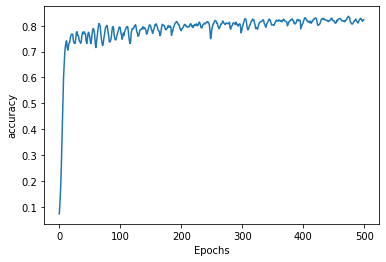

In [ ]:
plot_graphs(history, 'accuracy')

In [ ]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word #añadimos la predicción al texto inicial.
print(seed_text)

Pero, ¿sabes que cuantas más palabras predigas, más probable es que te pongas galimatías? Porque cada palabra se predice, por lo que no es 100% segura, y luego la siguiente es menos segura, y la siguiente, etc. 

#**Ejercicio de Shakespeare**

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np

In [ ]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [ ]:
model = Sequential()
model.add(# Your Embedding Layer)
model.add(# An LSTM Layer)
model.add(# A dropout layer)
model.add(# Another LSTM Layer)
model.add(# A Dense Layer including regularizers)
model.add(# A Dense Layer)
# Pick an optimizer
model.compile(# Pick a loss function and an optimizer)
print(model.summary())

In [ ]:
history = model.fit(predictors, label, epochs=100, verbose=1)

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

#**Respuesta**

#La respuesta es un poema.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np

In [ ]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

In [ ]:
history = model.fit(predictors, label, epochs=100, verbose=1)

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)